In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/set_b.csv")
df.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [2]:
df.shape

(656, 4)

In [3]:
df.describe()

,dataset,fname,label,sublabel
count,656,656,461,149
unique,1,656,3,2
top,b,set_b/Btraining_extrastole_229_1308594979317_B...,normal,noisynormal
freq,656,1,320,120


In [4]:
df.label.unique()

array(['extrastole', 'murmur', 'normal', nan], dtype=object)

In [5]:
df = df[pd.notnull(df["label"])]

df.shape

(461, 4)

In [6]:
df.label.unique()

array(['extrastole', 'murmur', 'normal'], dtype=object)

In [7]:
for i, _ in df.iterrows():
    path = df.loc[i, "fname"]
    path = path.replace("Btraining_", "")
    
    first_ind = path.find(df.loc[i, "label"])
    
    path = "./data/wav/" + path[first_ind:]
    
    if pd.isnull(df.loc[i, "sublabel"]):
        final_ind = path.find("_")

        path = path[:final_ind] + "_" + path[final_ind:]

    df.loc[i, "fname"] = path

In [8]:
df.head()

,dataset,fname,label,sublabel
0,b,./data/wav/extrastole__127_1306764300147_C2.wav,extrastole,NaN
1,b,./data/wav/extrastole__128_1306344005749_A.wav,extrastole,NaN
2,b,./data/wav/extrastole__130_1306347376079_D.wav,extrastole,NaN
3,b,./data/wav/extrastole__134_1306428161797_C1.wav,extrastole,NaN
4,b,./data/wav/extrastole__138_1306762146980_B.wav,extrastole,NaN


In [9]:
import librosa
import librosa.display

def graph_spectrogram(wav_file, save_png=False):
    window_size_sec = 0.96
    window_shift_sec = 0.01
    sample_rate = 1000
    data, sampling_rate = librosa.core.load(wav_file, sr=sample_rate, mono=True)
    win_length = int(sample_rate * window_size_sec)
    hop_length = int(sample_rate * window_shift_sec)
    n_fft = win_length # must be >= win_length
    spectrogram = librosa.core.stft(data, n_fft=n_fft, hop_length=64)
    spectrogram = librosa.feature.melspectrogram(S=spectrogram)
    ax = librosa.display.specshow(spectrogram)
    
    if save_png:
        plt.axis("off")
        plt.savefig(wav_file.replace("wav", "png"),
                    dpi=100, # Dots per inch
                    frameon=False,
                    aspect="normal",
                    bbox_inches="tight",
                    pad_inches=0) # Spectrogram saved as a .png
        plt.close("all")
    else:
        ax.plot()

def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

/home/svganesh/anaconda3/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):
/home/svganesh/anaconda3/lib/python3.6/site-packages/librosa/display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


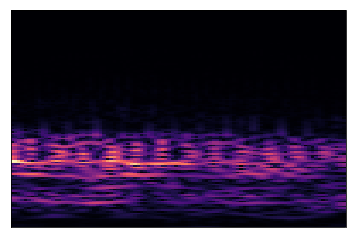

In [10]:
import IPython
from matplotlib import pyplot as plt
%matplotlib inline

ind = df[df.label == "normal"].first_valid_index()
graph_spectrogram(df.loc[ind, "fname"])

IPython.display.Audio(df.loc[ind, "fname"])

/home/svganesh/anaconda3/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):
/home/svganesh/anaconda3/lib/python3.6/site-packages/librosa/display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


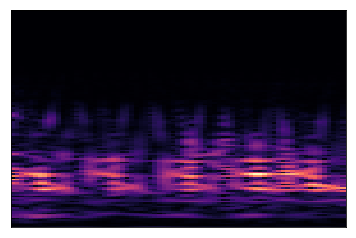

In [11]:
ind = df[df.label == "murmur"].first_valid_index()
graph_spectrogram(df.loc[ind, "fname"])


IPython.display.Audio(df.loc[ind, "fname"])

/home/svganesh/anaconda3/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):
/home/svganesh/anaconda3/lib/python3.6/site-packages/librosa/display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


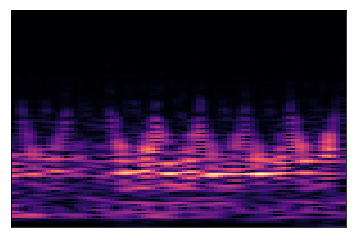

In [12]:
ind = df[df.label == "extrastole"].first_valid_index()
graph_spectrogram(df.loc[ind, "fname"])


IPython.display.Audio(df.loc[ind, "fname"])

In [13]:
from PIL import Image

graph_spectrogram(df.loc[ind, "fname"], True)

Image.open(df.loc[ind, "fname"].replace("wav", "png")).size

/home/svganesh/anaconda3/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):
/home/svganesh/anaconda3/lib/python3.6/site-packages/librosa/display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


(472, 309)

In [14]:
# from PIL import ImageChops

# def trim(im):
#     bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
#     diff = ImageChops.difference(im, bg)
#     diff = ImageChops.add(diff, diff, 2.0, -100)
#     bbox = diff.getbbox()
    
#     if bbox:
#         return im.crop(bbox)

In [15]:
# im = Image.open(df.loc[0, "fname"].replace("wav", "png"))
# im = trim(im)
# im.save(df.loc[0, "fname"].replace("wav", "png"))

global_size = Image.open(df.loc[ind, "fname"].replace("wav", "png")).size

In [16]:
df.loc[509, :].fname

'./data/wav/murmur_noisymurmur_135_1306428972976_C.wav'

In [17]:
print(df.loc[509, "fname"])

./data/wav/murmur_noisymurmur_135_1306428972976_C.wav


In [18]:
import time
import os.path

gen = False

for i, _ in df.iterrows():
    path = df.loc[i, "fname"].replace("wav", "png")
    df.loc[i, "iname"] = path

    if not os.path.isfile(path):
        gen = True
        graph_spectrogram(df.loc[i, "fname"], True)

#         im = trim(Image.open(path))
#         im.save(path)

        im = Image.open(path)

        if im.size != global_size:
            print("Variable Image Size: " + str(i) + ", " + str(im.size) + ", " + str(global_size))

    time.sleep(0.05)

if not gen:
    print("... already generated previously ...")

... already generated previously ...


In [19]:
map = {
    "normal": 0,
    "murmur": 1,
    "extrastole": 2
}

o_df = df

df = pd.DataFrame()
df["image"] = o_df["iname"]
df["label"]  = o_df["label"]

df.head()

,image,label
0,./data/png/extrastole__127_1306764300147_C2.png,extrastole
1,./data/png/extrastole__128_1306344005749_A.png,extrastole
2,./data/png/extrastole__130_1306347376079_D.png,extrastole
3,./data/png/extrastole__134_1306428161797_C1.png,extrastole
4,./data/png/extrastole__138_1306762146980_B.png,extrastole


In [20]:
df = df[df.label != "extrastole"]

for i, _ in df.iterrows():
    df.loc[i, "label"] = map[df.loc[i, "label"]]

df.head()

,image,label
46,./data/png/murmur__112_1306243000964_A.png,1
47,./data/png/murmur__112_1306243000964_B.png,1
48,./data/png/murmur__112_1306243000964_D.png,1
49,./data/png/murmur__116_1306258689913_A.png,1
50,./data/png/murmur__116_1306258689913_C.png,1


In [21]:
df["label"].value_counts()

0    320
1     95
Name: label, dtype: int64

In [22]:
from keras.preprocessing.image import img_to_array, load_img
from keras.utils import to_categorical

r_df = df.sample(frac=1).reset_index(drop=True)

X = np.array([])
Y = np.array([])

for _, row in r_df.iterrows():
    img = load_img(row.image)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    if X.size == 0:
        X = x
    else:
        X = np.vstack([X, x])

    y = np.asarray([row.label])
    y.reshape((1,) + y.shape)

    if Y.size == 0:
        Y = y
    else:
        Y = np.vstack([Y, y])

Y = to_categorical(Y)

/home/svganesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [24]:
import tensorflow as tf
import keras
from sklearn.metrics import roc_auc_score

def pair_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.int32)
    parts = tf.dynamic_partition(y_pred, y_true, 2)
    y_pos = parts[1]
    y_neg = parts[0]
    y_pos = tf.expand_dims(y_pos, 0)
    y_neg = tf.expand_dims(y_neg, -1)
    out = tf.sigmoid(y_neg - y_pos)
    return tf.reduce_mean(out)

class roc_callback(keras.callbacks.Callback):
    def __init__(self,training_data,validation_data):
        
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        
    
    def on_train_begin(self, logs={}):
        return
 
    def on_train_end(self, logs={}):
        return
 
    def on_epoch_begin(self, epoch, logs={}):
        return
 
    def on_epoch_end(self, epoch, logs={}):        
        y_pred = self.model.predict(self.x)
        roc = roc_auc_score(self.y, y_pred)      
        
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)      
        
        print('\rroc-auc: %s - roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return
 
    def on_batch_begin(self, batch, logs={}):
        return
 
    def on_batch_end(self, batch, logs={}):
        return
    
auroc_callback = roc_callback(training_data=(X_train, y_train), validation_data=(X_test, y_test))

In [25]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint
from keras import regularizers

model = Sequential([
    Convolution2D(64, (5, 5), activation="relu", input_shape=(309, 472, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Convolution2D(32, (5, 5), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, kernel_initializer="normal", kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(50, kernel_initializer="normal"),
    Dropout(0.5),
    BatchNormalization(),
    Dense(8, kernel_initializer="normal"),
    Dropout(0.3),
    BatchNormalization(),
    Dense(2, activation="softmax", kernel_initializer="normal", kernel_regularizer=regularizers.l2(0.01))
])

model.compile(loss=pair_loss, optimizer=Adam(0.0001), metrics=["accuracy"])

checkpoint = ModelCheckpoint("best_model_pair_weights.h5", monitor="val_loss", mode="min", save_best_only=True, period=5, save_weights_only=True)

# model.load_weights("model_weights.h5")

hist = model.fit(X_train, y_train, batch_size=4, epochs=150, shuffle=True, validation_data=(X_test, y_test), callbacks=[checkpoint, auroc_callback], verbose=2)

Train on 332 samples, validate on 83 samples
Epoch 1/150
roc-auc: 0.5667 - roc-auc_val: 0.5373                                                                                                    
 - 16s - loss: 5997.5677 - acc: 0.4849 - val_loss: 5227.1274 - val_acc: 0.5181
Epoch 2/150
roc-auc: 0.5427 - roc-auc_val: 0.4618                                                                                                    
 - 12s - loss: 4607.1818 - acc: 0.5361 - val_loss: 4028.8721 - val_acc: 0.6867
Epoch 3/150
roc-auc: 0.6141 - roc-auc_val: 0.5345                                                                                                    
 - 12s - loss: 3558.3777 - acc: 0.5693 - val_loss: 3118.0230 - val_acc: 0.8072
Epoch 4/150
roc-auc: 0.6338 - roc-auc_val: 0.5084                                                                                                    
 - 12s - loss: 2757.9418 - acc: 0.5994 - val_loss: 2419.5520 - val_acc: 0.6988
Epoch 5/150
roc-auc: 0.6498 - roc-auc_v

roc-auc: 0.7818 - roc-auc_val: 0.5578                                                                                                    
 - 12s - loss: 1.2832 - acc: 0.7410 - val_loss: 1.1737 - val_acc: 0.8072
Epoch 38/150
roc-auc: 0.8571 - roc-auc_val: 0.708                                                                                                    
 - 12s - loss: 1.2153 - acc: 0.7470 - val_loss: 1.2544 - val_acc: 0.8072
Epoch 39/150
roc-auc: 0.8025 - roc-auc_val: 0.6483                                                                                                    
 - 12s - loss: 1.0897 - acc: 0.7560 - val_loss: 1.0506 - val_acc: 0.6024
Epoch 40/150
roc-auc: 0.827 - roc-auc_val: 0.7369                                                                                                    
 - 13s - loss: 0.9631 - acc: 0.7530 - val_loss: 0.9571 - val_acc: 0.8072
Epoch 41/150
roc-auc: 0.8273 - roc-auc_val: 0.6791                                                                     

Epoch 74/150
roc-auc: 0.7687 - roc-auc_val: 0.6138                                                                                                    
 - 12s - loss: 0.9280 - acc: 0.7530 - val_loss: 0.7933 - val_acc: 0.8072
Epoch 75/150
roc-auc: 0.691 - roc-auc_val: 0.5597                                                                                                    
 - 12s - loss: 0.7916 - acc: 0.7590 - val_loss: 0.7021 - val_acc: 0.8072
Epoch 76/150
roc-auc: 0.7634 - roc-auc_val: 0.6838                                                                                                    
 - 12s - loss: 0.7672 - acc: 0.7620 - val_loss: 0.6734 - val_acc: 0.8072
Epoch 77/150
roc-auc: 0.7789 - roc-auc_val: 0.6334                                                                                                    
 - 12s - loss: 0.9644 - acc: 0.7620 - val_loss: 0.9287 - val_acc: 0.8072
Epoch 78/150
roc-auc: 0.7929 - roc-auc_val: 0.6325                                                       

Epoch 111/150
roc-auc: 0.6116 - roc-auc_val: 0.4328                                                                                                    
 - 12s - loss: 0.5489 - acc: 0.7620 - val_loss: 0.5068 - val_acc: 0.8072
Epoch 112/150
roc-auc: 0.582 - roc-auc_val: 0.3284                                                                                                    
 - 12s - loss: 0.5119 - acc: 0.7620 - val_loss: 0.5569 - val_acc: 0.8072
Epoch 113/150
roc-auc: 0.6313 - roc-auc_val: 0.5569                                                                                                    
 - 12s - loss: 0.5869 - acc: 0.7620 - val_loss: 0.5325 - val_acc: 0.8072
Epoch 114/150
roc-auc: 0.5939 - roc-auc_val: 0.5681                                                                                                    
 - 12s - loss: 0.5079 - acc: 0.7620 - val_loss: 0.5063 - val_acc: 0.8072
Epoch 115/150
roc-auc: 0.6358 - roc-auc_val: 0.4916                                                  

Epoch 148/150
roc-auc: 0.5835 - roc-auc_val: 0.6213                                                                                                    
 - 12s - loss: 0.5360 - acc: 0.7620 - val_loss: 0.5099 - val_acc: 0.8072
Epoch 149/150
roc-auc: 0.543 - roc-auc_val: 0.5168                                                                                                    
 - 12s - loss: 0.4820 - acc: 0.7620 - val_loss: 0.4464 - val_acc: 0.8072
Epoch 150/150
roc-auc: 0.63 - roc-auc_val: 0.6894                                                                                                    
 - 12s - loss: 0.4886 - acc: 0.7620 - val_loss: 0.4428 - val_acc: 0.8072


In [26]:
model.load_weights("best_model_pair_weights.h5")

model.evaluate(X_test, y_test, batch_size=8)

83/83 [==============================] - 1s 9ms/step


[0.4235720059957849, 0.8072289156626506]

In [27]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)
roc_auc_score(y_test, y_prob)

0.7145522388059702

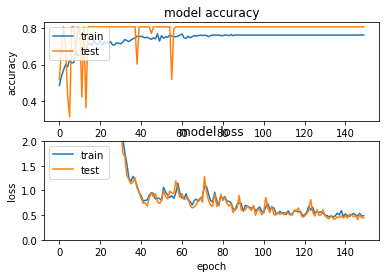

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)

# summarize history for accuracy
plt.subplot(211)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymax=2, ymin=0)
plt.show()